# Earthquake prediction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv("Data/train.csv",
                    dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})


print('There are {} measurements in the file.'.format(len(train)))

There are 629145480 measurements in the file.


## Plot the data measurements (sampled at 1/50)

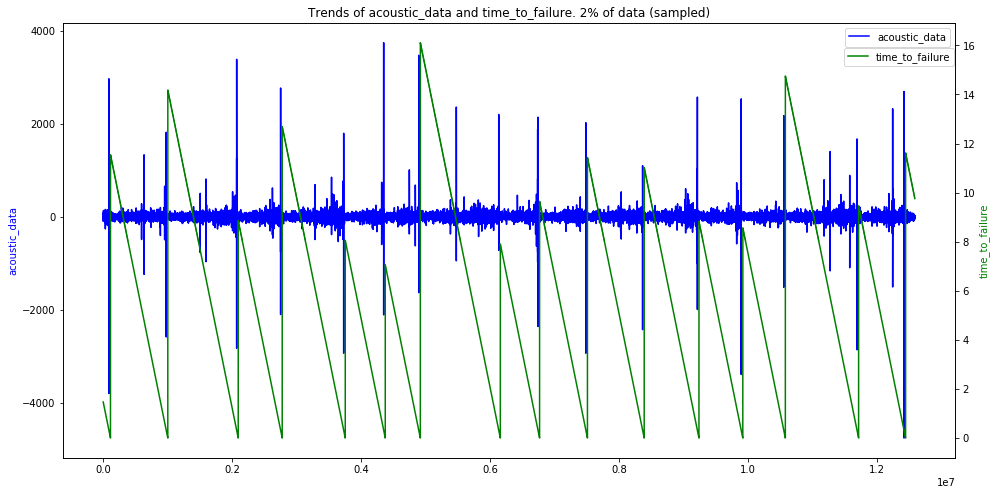

In [2]:
train_acoustic_data_small = train['acoustic_data'].values[::50]
train_time_to_failure_small = train['time_to_failure'].values[::50]

fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("Trends of acoustic_data and time_to_failure. 2% of data (sampled)")
plt.plot(train_acoustic_data_small, color='b')
ax1.set_ylabel('acoustic_data', color='b')
plt.legend(['acoustic_data'])
ax2 = ax1.twinx()
plt.plot(train_time_to_failure_small, color='g')
ax2.set_ylabel('time_to_failure', color='g')
plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(False)

del train_acoustic_data_small
del train_time_to_failure_small


## How m

In [13]:
#time_0 = train['time_to_failure'].min()
events = (train['time_to_failure']<time_0+9e-9).astype(int)
n_events = sum(events)
print('There are {} events in the data.'.format(n_events))

There are 16 events in the data.


Preprocessing:
- opsplitsen data?
- unable to load data completely.
    - can we load the data when we split up the events in the training data?
- find/define algorithm (when we cannot load complete test signal):
    - load next part of the signal
    - analyze signal
    - update time-to-failure value (increase or decrease) 

Training:
- How do we train the way we analyze a part of the signal
    - Connect certain features to certain time-to-failure
    - If the features predict a certain time-to-failure and the previous (current) time-to-failure value is higher, then we should lower the previous time to failure.
- Feature selection?
    - Of the current part/ of the complete training part
    - Average frequency 
    - Average amplitude
    - Maximal amplitude
- Fourier analysis